# Аналіз модуля №1 (Тест). КН-1 2024

---

## 1. Пакети

In [5]:
# install.packages("tidyverse")

In [77]:
library(tidyverse)
library(readxl)

## 2. Читання документа

In [78]:
path <- "data/test.xlsx"

In [95]:
group <- "kn1" #ek2

In [96]:
test_data <- read_excel(path, sheet = group)
keys_data <- read_excel(path, sheet = "keys")

In [97]:
colnames(test_data) <- c("No", "Std", "V", paste0("Q", 1:20))

In [98]:
test_data <- test_data |>
    #mutate(Std = "****** ****") |>
    mutate(V = ifelse(V %% 2 == 0, 2, 1)) |>
    mutate_at(colnames(test_data)[4:23], factor, levels = c("A", "B", "C", "D", "X")) |>
    mutate(across(everything(), ~replace_na(.x, "X")))
head(test_data)

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Фесюк Сергій,1,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
2,ГРИЦАЮК БОГДАН,2,C,B,D,B,A,B,B,...,A,B,A,C,A,C,D,C,B,C
3,СТАВСЬКИЙ АНДРІЙ,2,A,B,D,B,D,C,B,...,A,C,C,D,A,B,B,B,B,C
4,БАСОК МАКСИМ,2,C,A,D,D,B,C,D,...,D,C,A,C,B,B,D,A,B,C
5,РАДЧУК НАТАЛІЯ,1,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
6,БОЖЕНКО АНАСТАСІЯ,2,D,B,A,B,B,C,D,...,A,C,D,B,A,D,A,D,D,C


In [99]:
test_data_v1 <- test_data |> filter(V == 1)
nrow(test_data_v1)
test_data_v2 <- test_data |> filter(V == 2)
nrow(test_data_v2)

[1] 29

[1] 33

In [100]:
colnames(test_data_v2) <- c("No", "Std", "V", paste0("Q", keys_data$V2N))
test_data_v2 <- test_data_v2 |> select(No, Std, V, , paste0("Q", 1:20))
head(test_data_v2)

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,ГРИЦАЮК БОГДАН,2,A,C,C,A,C,C,D,...,C,B,D,B,B,A,B,B,C,B
3,СТАВСЬКИЙ АНДРІЙ,2,C,D,B,A,B,A,B,...,C,B,D,B,C,A,C,A,C,C
4,БАСОК МАКСИМ,2,A,C,A,B,B,C,D,...,C,A,D,D,C,D,C,A,A,C
6,БОЖЕНКО АНАСТАСІЯ,2,D,B,D,A,D,D,A,...,C,B,A,D,B,A,C,D,A,C
12,ПУШКА РОМАН,2,C,A,D,D,C,A,A,...,C,A,B,B,C,B,C,C,C,C
16,МАХНІЙ АННА,2,C,D,A,A,C,C,B,...,C,B,D,D,B,D,A,C,A,A


In [101]:
test_data <- test_data_v1 |>
    bind_rows(test_data_v2)

In [102]:
answers_matrix <-  test_data |> select(Q1:Q20) |> as.matrix()
answers_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,B,C,A,D,B,B,D,D,A,B,C,C,B,C,A,B,D,A,B
C,C,C,C,B,B,C,A,B,A,C,C,C,A,B,A,D,D,B,A
C,C,C,C,C,B,B,C,A,A,C,C,C,B,C,B,B,A,A,B
C,B,B,C,C,B,D,A,A,B,C,C,C,B,B,A,C,D,A,B
C,C,D,D,C,C,B,C,A,A,D,C,C,A,B,X,X,X,X,X
B,C,C,C,B,A,B,A,A,A,B,C,C,C,B,B,A,C,C,B
D,C,B,C,D,C,B,A,B,A,B,C,B,D,A,B,B,D,A,A
B,B,A,C,C,D,C,D,B,C,D,C,B,C,B,A,C,D,C,A
C,B,D,A,C,B,B,D,B,C,A,D,C,A,C,A,C,D,A,B
C,B,D,D,C,B,D,D,A,D,C,C,C,B,C,D,D,A,A,A


In [103]:
correct_answers <- keys_data$V1

In [104]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- answers_matrix[, i] == correct_answers[i]
}

In [105]:
final_matrix

TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [106]:
grade <- 15/20
grade
final_grades <- test_data |> select(1:3) |>
    bind_cols(as.data.frame(final_matrix))
colnames(final_grades) <- colnames(test_data)

final_grades <- final_grades |>
   mutate_if(is.logical, function(x) {ifelse(x, grade, 0)}) 

final_grades <- final_grades |>
    rowwise() |>
   mutate(Total = sum(across(Q1:Q20), na.rm = T)) 

final_grades

[1] 0.75

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Фесюк Сергій,1,0.75,0.00,0.75,0.00,0.75,0.00,0.00,...,0.00,0.75,0.75,0.75,0.00,0.00,0.00,0.75,0.00,6.00
5,РАДЧУК НАТАЛІЯ,1,0.75,0.75,0.75,0.00,0.00,0.00,0.00,...,0.00,0.75,0.00,0.00,0.00,0.75,0.00,0.00,0.75,5.25
7,АНПІЛОГОВ АНТОН,1,0.75,0.75,0.75,0.00,0.00,0.00,0.00,...,0.00,0.75,0.75,0.75,0.75,0.00,0.75,0.75,0.00,9.00
8,ЗЛОЖЕНКО АНДРІЙ,1,0.75,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.75,0.75,0.00,0.00,0.00,0.00,0.75,0.00,3.75
9,ГЕРАСИМЧУК НАТАЛІЯ,1,0.75,0.75,0.00,0.75,0.00,0.75,0.00,...,0.00,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.75
10,АНУКОЩУК РОМАН,1,0.00,0.75,0.75,0.00,0.00,0.00,0.00,...,0.00,0.75,0.00,0.00,0.75,0.00,0.00,0.00,0.00,4.50
11,ЮРКІВ ДЕНИС,1,0.00,0.75,0.00,0.00,0.75,0.75,0.00,...,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.75,0.75,5.25
13,ТАБАЧУК ОЛЕКСАНДР,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.75,1.50
14,ДЯЧУК ДАРИНА,1,0.75,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.75,0.00,0.75,0.00,0.00,0.00,0.75,0.00,3.75


In [107]:
max()

Warning message in max():
"no non-missing arguments to max; returning -Inf"


[1] -Inf

In [108]:
final_grades |> 
select(2,24) |> 
arrange(desc(Total)) |> 
mutate(TotalFinal = Total/max(final_grades$Total)*15)

Std,Total,TotalFinal
<chr>,<dbl>,<dbl>
ЛІЗАК ДАНИЇЛ,12.00,15.0000
АНПІЛОГОВ АНТОН,9.00,11.2500
КЛИМЕНКО АНАСТАСІЯ,9.00,11.2500
НЕЧИПУРУК МАРІЯ,8.25,10.3125
МУКОМЕЛ БОГДАН,7.50,9.3750
ВОРОБЕЙ ЮРІЙ,7.50,9.3750
ГЕРАСИМЧУК НАТАЛІЯ,6.75,8.4375
ГУЛІЄВ АРТУР,6.75,8.4375
МАРИНІН ДАНИЛ,6.75,8.4375


In [109]:
mean(final_grades$Total)

[1] 4.270161

In [110]:
table(test1_data$V)

ERROR: Error in table(test1_data$V): object 'test1_data' not found


In [111]:
x <- test_data |> select(Q1:Q20) |> unlist() |> table() |> prop.table() |> as.data.frame() 
x

Var1,Freq
<fct>,<dbl>
A,0.208870968
B,0.258870968
C,0.299193548
D,0.223387097
X,0.009677419


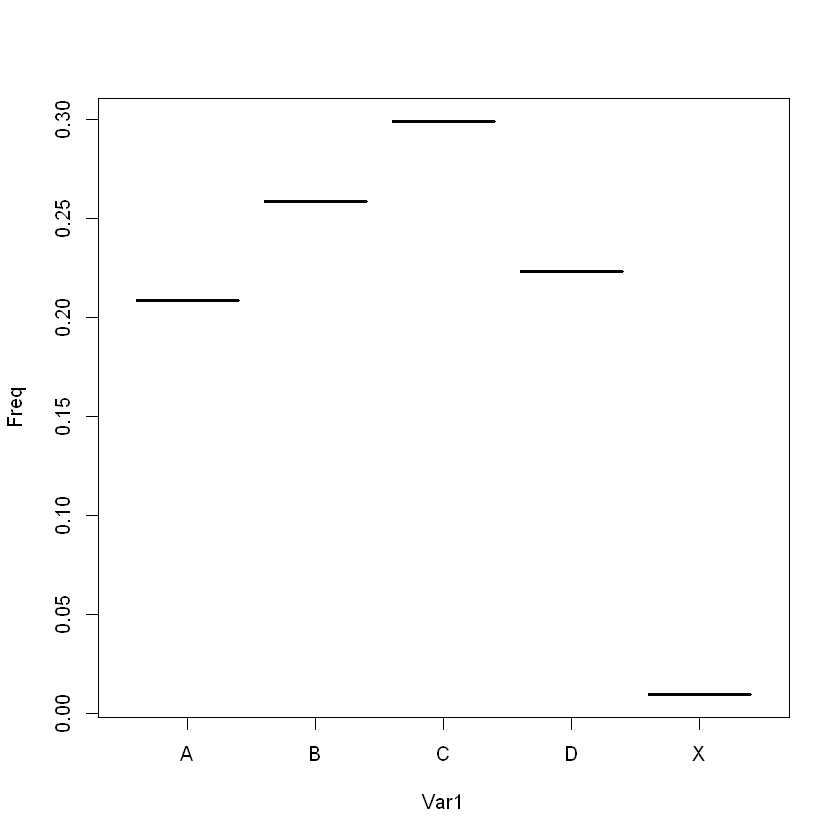

In [112]:
plot(x)

In [113]:
summary(test1_data)

ERROR: Error in summary(test1_data): object 'test1_data' not found


In [114]:
test_data

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Фесюк Сергій,1,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
5,РАДЧУК НАТАЛІЯ,1,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
7,АНПІЛОГОВ АНТОН,1,C,C,C,C,C,B,B,...,C,C,C,B,C,B,B,A,A,B
8,ЗЛОЖЕНКО АНДРІЙ,1,C,B,B,C,C,B,D,...,C,C,C,B,B,A,C,D,A,B
9,ГЕРАСИМЧУК НАТАЛІЯ,1,C,C,D,D,C,C,B,...,D,C,C,A,B,X,X,X,X,X
10,АНУКОЩУК РОМАН,1,B,C,C,C,B,A,B,...,B,C,C,C,B,B,A,C,C,B
11,ЮРКІВ ДЕНИС,1,D,C,B,C,D,C,B,...,B,C,B,D,A,B,B,D,A,A
13,ТАБАЧУК ОЛЕКСАНДР,1,B,B,A,C,C,D,C,...,D,C,B,C,B,A,C,D,C,A
14,ДЯЧУК ДАРИНА,1,C,B,D,A,C,B,B,...,A,D,C,A,C,A,C,D,A,B
